In [5]:
#imports
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas


In [6]:
firstOveralls = pd.read_csv('data/first_overalls.csv')
firstOverallsPlayerData = pd.read_csv('data/first_overalls_player_data.csv')
nhlDraftData = pd.read_csv('data/nhl_draft_data.csv')
nhlPlayerData = pd.read_csv('data/nhl_player_data_2000-2020.csv')
playsGoal = pd.read_csv('data/playsGoalWithFOInfo.csv')


In [8]:
#Make dataframe pipeline interactive
#thin playsGoal to only include columns we want to use(xCoord, yCoord, scoringPlayerId, playerName)
# Make a copy of the slice
myDf = playsGoal[['xCoord', 'yCoord', 'scoringPlayerId', 'playerName']].copy()

# Find rows where xCoord is negative
negative_xCoord = myDf['xCoord'] < 0

# Invert yCoord for these rows
myDf.loc[negative_xCoord, 'yCoord'] = myDf.loc[negative_xCoord, 'yCoord'] * -1

# Make xCoord positive only
myDf['xCoord'] = myDf['xCoord'].abs()


# Fill NAs with 0s and create GDP per capita column
myDf = myDf.fillna(0)

# Make DataFrame Pipeline Interactive
myIdf = myDf.interactive()

In [9]:
# Define Panel widgets
player_select = pn.widgets.Select(name='Select', options=myDf['playerName'].unique().tolist())
player_select

BokehModel(combine_events=True, render_bundle={'docs_json': {'1d08a0f2-3f7b-4787-a479-d6bde40a85ad': {'version…

In [10]:
xCoord_vs_yCoord_scatterplot_pipeline = (
    myIdf[
        (myIdf.playerName == player_select)
    ]
)


In [11]:
xCoord_vs_yCoord_scatterplot_pipeline

BokehModel(combine_events=True, render_bundle={'docs_json': {'66ff1d03-54a0-4d2b-95a6-2d747077a0df': {'version…

In [12]:
xCoord_vs_yCoord_scatterplot = xCoord_vs_yCoord_scatterplot_pipeline.hvplot(x='xCoord', 
                                                                y='yCoord',
                                                                size=80, kind="scatter", 
                                                                alpha=0.4,
                                                                legend=False, 
                                                                height=500, 
                                                                width=500)
xCoord_vs_yCoord_scatterplot

BokehModel(combine_events=True, render_bundle={'docs_json': {'66034c48-c119-42a1-88c0-5fc5522919ca': {'version…

--------------------------------------------------------------------------------------------------------------

Dropdown(description='Player:', options=('Alexis Lafrenière', 'Rasmus Dahlin', 'John Tavares', 'Taylor Hall', …

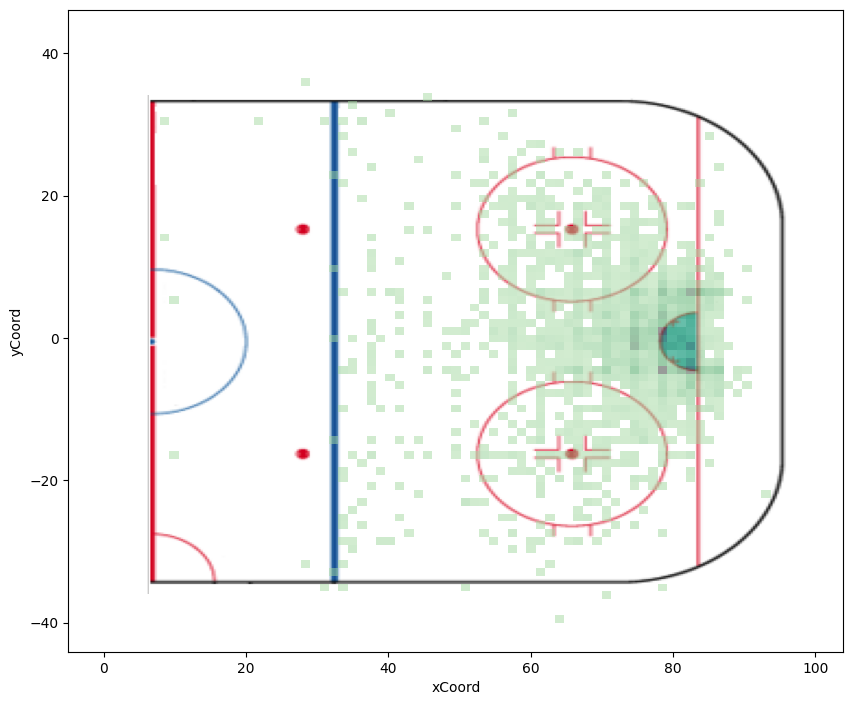

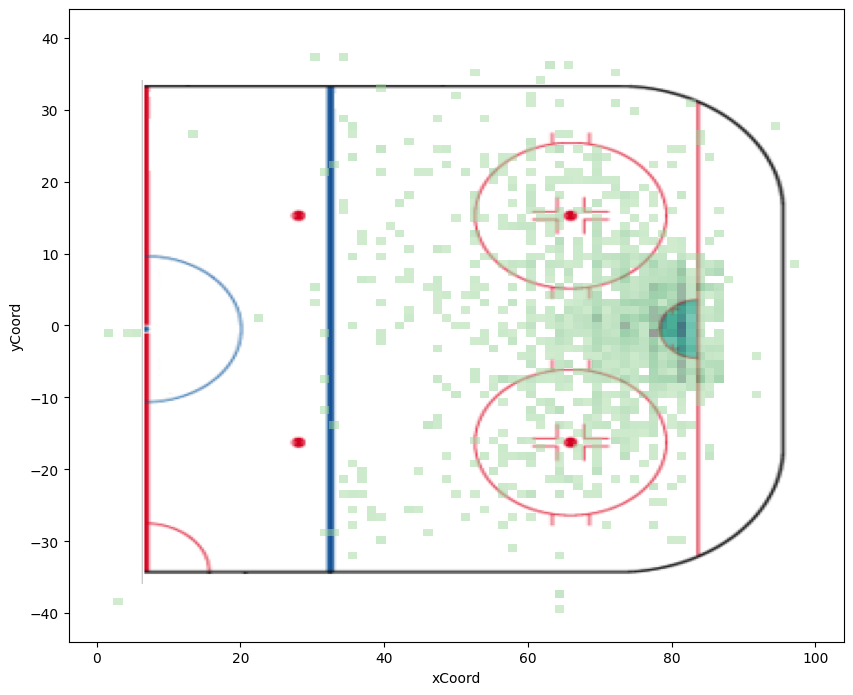

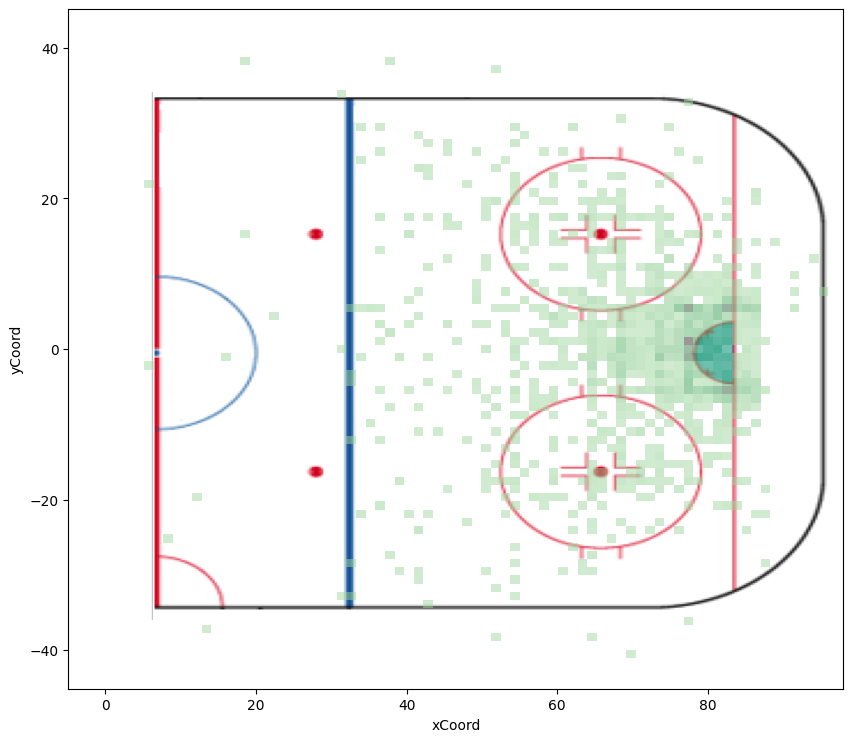

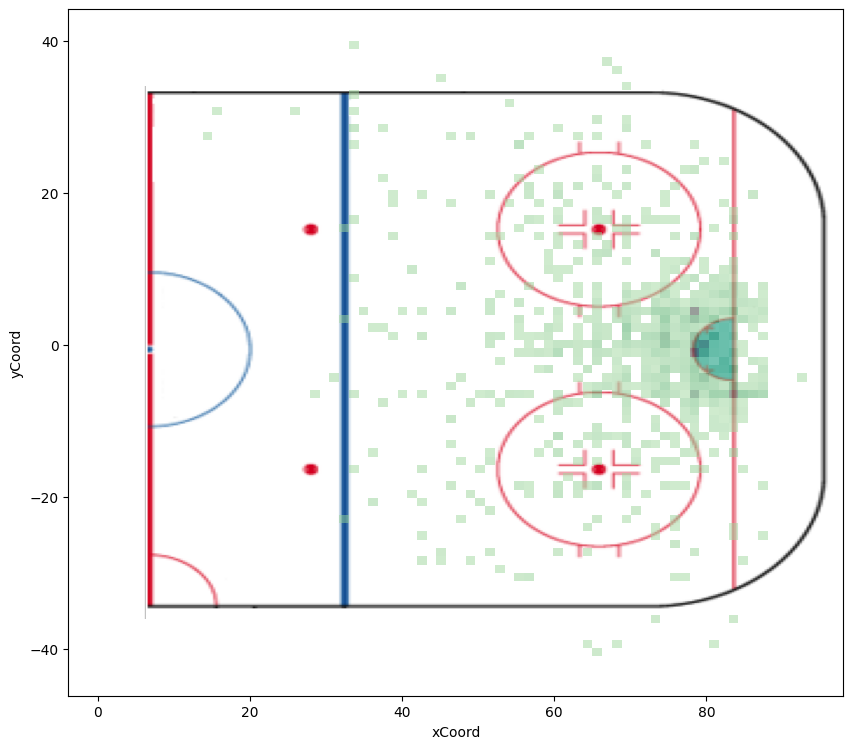

In [87]:
# Load the image
img = mpimg.imread('Half_ice_hockey_rink.png')

# Create a dropdown menu
dropdown = widgets.Dropdown(
    options=cordToGoals['playerName'].unique().tolist(),
    value=cordToGoals['playerName'].unique().tolist()[0],
    description='Player:',
)

# Function to update the plot
def update_plot(change):
    plt.figure(figsize=(10, 10))
    plt.imshow(img, extent=[6, 98, -36, 34])
    player_data = cordToGoals[cordToGoals['playerName'] == dropdown.value]
    sns.histplot(data=player_data, x='xCoord', y='yCoord', bins=75, pthresh=.1, cmap='Greens_d', alpha=0.5)
    plt.show()

# Update the plot when the dropdown value changes
dropdown.observe(update_plot, names='value')

# Display the dropdown
display(dropdown)

# Display the initial plot
update_plot(None)

In [28]:
#create heatmap based on cordToGoals
cordToGoals.hvplot.hexbin(x='xCoord', y='yCoord', reduce_function=np.mean, 
                          hover_cols=['playerName'], width=800, height=600, cmap='viridis', 
                          title='Goals Scored by Location')

DataError: None of the available storage backends were able to support the supplied data format.

:HexTiles   [xCoord,yCoord]   (playerName)

In [22]:
# Create a Panel layout with the widget and the heatmap
dashboard = pn.Row(playerSelector, create_heatmap)

In [23]:
dashboard.servable()

TypeError: unsupported operand type(s) for -=: 'str' and 'float'

Row
    [0] Select(name='Player', options=['Alexis Lafrenière', ...], value='Alexis Lafrenière')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)